In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [3]:
calendar_df = pd.read_csv('calendar.zip')
print(calendar_df.shape)
listings_df = pd.read_csv('listings.zip')
print(listings_df.shape)
reviews_df = pd.read_csv('reviews.zip')
print(reviews_df.shape)


(4190565, 7)


I:\Python\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(11481, 106)
(175562, 6)


# A Look at the Data

In [4]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,f,f,flexible,f,f,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.52
3,127383,https://www.airbnb.com/rooms/127383,20191125094942,2019-11-25,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,none,NaN,...,f,f,flexible,t,f,2,1,1,0,0.79
4,157808,https://www.airbnb.com/rooms/157808,20191125094942,2019-11-25,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,none,"In der Nähe befinden sich einige Kaffees,Kneip...",...,f,f,moderate,f,f,1,0,1,0,NaN


In [5]:
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

There are too many columns, let's eliminate the ones that don't look helpful.
First we'll narrow it down by removing the ones with too many missing values.

In [6]:
listings_df.isnull().mean()>.5

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
name                                            False
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                               False
Length: 106, dtype: bool

In [7]:
#We'll drop these ones
listings_df.isnull().mean()[lambda x : x>.5]

notes                           0.710043
access                          0.559185
house_rules                     0.516157
thumbnail_url                   1.000000
medium_url                      1.000000
xl_picture_url                  1.000000
host_about                      0.563540
host_acceptance_rate            1.000000
neighbourhood_group_cleansed    1.000000
square_feet                     0.985454
weekly_price                    0.903406
monthly_price                   0.937288
license                         0.999652
jurisdiction_names              1.000000
dtype: float64

In [8]:
listings_df = listings_df.drop(listings_df.isnull().mean()[lambda x : x>.5].index, axis=1)

In [9]:
listings_df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,f,f,flexible,f,f,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.52
3,127383,https://www.airbnb.com/rooms/127383,20191125094942,2019-11-25,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,none,NaN,...,f,f,flexible,t,f,2,1,1,0,0.79
4,157808,https://www.airbnb.com/rooms/157808,20191125094942,2019-11-25,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,none,"In der Nähe befinden sich einige Kaffees,Kneip...",...,f,f,moderate,f,f,1,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,40342200,https://www.airbnb.com/rooms/40342200,20191125094942,2019-11-25,Charmante Altbauwohnung im Herzen von München,"Sehr charmante, helle Altbauwohnung im Herzen ...",NaN,"Sehr charmante, helle Altbauwohnung im Herzen ...",none,Ruhiges Bewohnerviertel ohne Durchgangsverkehr...,...,f,f,moderate,f,f,1,1,0,0,NaN
11477,40343877,https://www.airbnb.com/rooms/40343877,20191125094942,2019-11-25,Central apartment near the Bavaria,"Big living room with large living room table, ...",NaN,"Big living room with large living room table, ...",none,NaN,...,f,f,flexible,f,f,4,1,3,0,NaN
11478,40344151,https://www.airbnb.com/rooms/40344151,20191125094942,2019-11-25,Room in Laim,The apartment is in Laim. Bus stop and a tram ...,NaN,The apartment is in Laim. Bus stop and a tram ...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
11479,40347084,https://www.airbnb.com/rooms/40347084,20191125094942,2019-11-25,Neuhausen mit persönlichem Ambiente !,"Sie sind eingeladen, meine Wohnung (wunderbar ...",NaN,"Sie sind eingeladen, meine Wohnung (wunderbar ...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,NaN


In [10]:
listings_df[listings_df.columns[listings_df.columns.str.contains('review')]].query('review_scores_cleanliness < 10')

,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
5,31,4,2011-08-15,2019-09-29,93.0,9.0,9.0,9.0,10.0,9.0,9.0,0.31
7,61,3,2011-08-31,2019-11-13,91.0,9.0,9.0,10.0,10.0,9.0,9.0,0.61
11,65,10,2011-07-31,2019-11-02,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0.64
12,234,88,2011-10-02,2019-11-08,98.0,9.0,9.0,10.0,10.0,10.0,10.0,2.36
14,32,8,2011-09-26,2019-10-08,97.0,10.0,9.0,10.0,10.0,10.0,9.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...
11243,2,2,2019-11-14,2019-11-20,100.0,10.0,9.0,10.0,10.0,9.0,10.0,2.00
11247,2,2,2019-11-10,2019-11-13,90.0,10.0,9.0,10.0,10.0,10.0,9.0,2.00
11312,1,1,2019-11-11,2019-11-11,80.0,10.0,8.0,10.0,10.0,8.0,8.0,1.00
11331,1,1,2019-11-16,2019-11-16,100.0,10.0,6.0,10.0,10.0,10.0,8.0,1.00


In [11]:
listings_df[listings_df.columns[listings_df.columns.str.contains('review')]]['review_scores_cleanliness'].value_counts()

10.0    5757
9.0     1957
8.0      709
7.0      121
6.0      118
4.0       29
2.0       24
5.0       22
3.0        2
Name: review_scores_cleanliness, dtype: int64

In [12]:
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 92 columns):
id                                              11481 non-null int64
listing_url                                     11481 non-null object
scrape_id                                       11481 non-null int64
last_scraped                                    11481 non-null object
name                                            11459 non-null object
summary                                         10863 non-null object
space                                           7197 non-null object
description                                     11178 non-null object
experiences_offered                             11481 non-null object
neighborhood_overview                           6151 non-null object
transit                                         7139 non-null object
interaction                                     5826 non-null object
picture_url                                     11481 non

In [13]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36720,https://www.airbnb.com/rooms/36720,20191125094942,2019-11-25,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",none,Glockenbachviertel area has the hippest restau...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.37
1,97945,https://www.airbnb.com/rooms/97945,20191125094942,2019-11-25,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",none,We are living in a outskirt of Munich its call...,...,f,f,flexible,f,f,1,1,0,0,1.32
2,114695,https://www.airbnb.com/rooms/114695,20191125094942,2019-11-25,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.52
3,127383,https://www.airbnb.com/rooms/127383,20191125094942,2019-11-25,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,none,NaN,...,f,f,flexible,t,f,2,1,1,0,0.79
4,157808,https://www.airbnb.com/rooms/157808,20191125094942,2019-11-25,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,none,"In der Nähe befinden sich einige Kaffees,Kneip...",...,f,f,moderate,f,f,1,0,1,0,NaN


In [14]:
pd.set_option('display.max_columns', None)


In [15]:
listings_df[[
    'id', 'name', 'summary', 'space', 'description', 'cancellation_policy',
    'host_has_profile_pic'
]]

,id,name,summary,space,description,cancellation_policy,host_has_profile_pic
0,36720,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",strict_14_with_grace_period,t
1,97945,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",flexible,t
2,114695,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,strict_14_with_grace_period,NaN
3,127383,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,flexible,t
4,157808,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,moderate,t
...,...,...,...,...,...,...,...
11476,40342200,Charmante Altbauwohnung im Herzen von München,"Sehr charmante, helle Altbauwohnung im Herzen ...",NaN,"Sehr charmante, helle Altbauwohnung im Herzen ...",moderate,t
11477,40343877,Central apartment near the Bavaria,"Big living room with large living room table, ...",NaN,"Big living room with large living room table, ...",flexible,t
11478,40344151,Room in Laim,The apartment is in Laim. Bus stop and a tram ...,NaN,The apartment is in Laim. Bus stop and a tram ...,flexible,t
11479,40347084,Neuhausen mit persönlichem Ambiente !,"Sie sind eingeladen, meine Wohnung (wunderbar ...",NaN,"Sie sind eingeladen, meine Wohnung (wunderbar ...",moderate,t


In [16]:
listings_selected_cols = listings_df[['id', 'name', 'summary', 'space', 'description', 'cancellation_policy', 'host_has_profile_pic',
            'host_is_superhost', 'host_total_listings_count', 'neighbourhood_cleansed', 'latitude', 'longitude' ,
            'property_type', 'room_type', 'accommodates', 'bedrooms', 'bathrooms', 'beds' ,'bed_type', 'amenities',
            'price', 'cleaning_fee' ,'review_scores_rating','cancellation_policy', 'reviews_per_month' ]].copy()

# Data Cleaning
* Change Prices to numeric

In [17]:
# Renaming neighbourhood
listings_selected_cols.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace=True)
listings_selected_cols

,id,name,summary,space,description,cancellation_policy,host_has_profile_pic,host_is_superhost,host_total_listings_count,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,bathrooms,beds,bed_type,amenities,price,cleaning_fee,review_scores_rating,cancellation_policy,reviews_per_month
0,36720,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",strict_14_with_grace_period,t,f,1.0,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$95.00,$30.00,98.0,strict_14_with_grace_period,0.37
1,97945,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",flexible,t,t,1.0,Hadern,48.11476,11.48782,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free street parki...",$80.00,$10.00,97.0,flexible,1.32
2,114695,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,strict_14_with_grace_period,NaN,NaN,NaN,Berg am Laim,48.11923,11.63726,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",$95.00,$60.00,95.0,strict_14_with_grace_period,0.52
3,127383,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,flexible,t,t,2.0,Maxvorstadt,48.15198,11.56486,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Pets allowed"",Bre...",$120.00,$28.00,97.0,flexible,0.79
4,157808,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,moderate,t,f,0.0,Schwabing-West,48.16381,11.56089,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$35.00,$10.00,NaN,moderate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,40342200,Charmante Altbauwohnung im Herzen von München,"Sehr charmante, helle Altbauwohnung im Herzen ...",NaN,"Sehr charmante, helle Altbauwohnung im Herzen ...",moderate,t,f,0.0,Neuhausen-Nymphenburg,48.14833,11.54345,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Kitchen,Heating,""Smoke detector"",Essentials,S...",$80.00,NaN,NaN,moderate,NaN
11477,40343877,Central apartment near the Bavaria,"Big living room with large living room table, ...",NaN,"Big living room with large living room table, ...",flexible,t,f,3.0,Sendling,48.12343,11.53969,Apartment,Private room,6,2.0,2.0,5.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",$180.00,$80.00,NaN,flexible,NaN
11478,40344151,Room in Laim,The apartment is in Laim. Bus stop and a tram ...,NaN,The apartment is in Laim. Bus stop and a tram ...,flexible,t,f,0.0,Laim,48.13829,11.51235,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Heating,""Smoke detector"",Essenti...",$30.00,NaN,NaN,flexible,NaN
11479,40347084,Neuhausen mit persönlichem Ambiente !,"Sie sind eingeladen, meine Wohnung (wunderbar ...",NaN,"Sie sind eingeladen, meine Wohnung (wunderbar ...",moderate,t,f,0.0,Neuhausen-Nymphenburg,48.14794,11.53698,Apartment,Entire home/apt,1,1.0,1.0,NaN,Real Bed,"{TV,Wifi,Kitchen,Breakfast,Elevator,Heating,Wa...",$40.00,NaN,NaN,moderate,NaN


In [18]:
# Converting prices to number (Removing $ and ,)

listings_selected_cols['price'] = listings_selected_cols['price'].str.replace('$','').str.replace(',','').astype(float)
listings_selected_cols['cleaning_fee'] = listings_selected_cols['cleaning_fee'].str.replace('$','').str.replace(',','').astype(float)

In [19]:
listings_selected_cols

,id,name,summary,space,description,cancellation_policy,host_has_profile_pic,host_is_superhost,host_total_listings_count,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bedrooms,bathrooms,beds,bed_type,amenities,price,cleaning_fee,review_scores_rating,cancellation_policy,reviews_per_month
0,36720,"Beautiful 2 rooms flat, Glockenbach","Very quiet, yet centrally located 2 rooms apt....","2-Zimmer Altbauwohung Beste Lage, zentral, im ...","Very quiet, yet centrally located 2 rooms apt....",strict_14_with_grace_period,t,f,1.0,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",95.0,30.0,98.0,strict_14_with_grace_period,0.37
1,97945,Deluxw-Apartm. with roof terrace,NaN,"We offer a modern, quiet apartment with a sunn...","We offer a modern, quiet apartment with a sunn...",flexible,t,t,1.0,Hadern,48.11476,11.48782,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free street parki...",80.0,10.0,97.0,flexible,1.32
2,114695,Apartment Munich/East with sundeck,NaN,It´s a quiet and sunny apartment close to the ...,It´s a quiet and sunny apartment close to the ...,strict_14_with_grace_period,NaN,NaN,NaN,Berg am Laim,48.11923,11.63726,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",95.0,60.0,95.0,strict_14_with_grace_period,0.52
3,127383,City apartment next to Pinakothek,Die Wohnung hat 55 qm und ist voll ausgestatte...,My cosy apartment is located in the heart of M...,My cosy apartment is located in the heart of M...,flexible,t,t,2.0,Maxvorstadt,48.15198,11.56486,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Pets allowed"",Bre...",120.0,28.0,97.0,flexible,0.79
4,157808,"Near Olympia,English Garden",Kleines gemütliches Privat Zimmer mit Kabel TV...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,Kleines gemütliches Privat Zimmer ca.14qm möbl...,moderate,t,f,0.0,Schwabing-West,48.16381,11.56089,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",35.0,10.0,NaN,moderate,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,40342200,Charmante Altbauwohnung im Herzen von München,"Sehr charmante, helle Altbauwohnung im Herzen ...",NaN,"Sehr charmante, helle Altbauwohnung im Herzen ...",moderate,t,f,0.0,Neuhausen-Nymphenburg,48.14833,11.54345,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Kitchen,Heating,""Smoke detector"",Essentials,S...",80.0,NaN,NaN,moderate,NaN
11477,40343877,Central apartment near the Bavaria,"Big living room with large living room table, ...",NaN,"Big living room with large living room table, ...",flexible,t,f,3.0,Sendling,48.12343,11.53969,Apartment,Private room,6,2.0,2.0,5.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",180.0,80.0,NaN,flexible,NaN
11478,40344151,Room in Laim,The apartment is in Laim. Bus stop and a tram ...,NaN,The apartment is in Laim. Bus stop and a tram ...,flexible,t,f,0.0,Laim,48.13829,11.51235,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Heating,""Smoke detector"",Essenti...",30.0,NaN,NaN,flexible,NaN
11479,40347084,Neuhausen mit persönlichem Ambiente !,"Sie sind eingeladen, meine Wohnung (wunderbar ...",NaN,"Sie sind eingeladen, meine Wohnung (wunderbar ...",moderate,t,f,0.0,Neuhausen-Nymphenburg,48.14794,11.53698,Apartment,Entire home/apt,1,1.0,1.0,NaN,Real Bed,"{TV,Wifi,Kitchen,Breakfast,Elevator,Heating,Wa...",40.0,NaN,NaN,moderate,NaN


# Broad overview of what to do

1. Relationship of price and neighbourhood, room characteristics(i.e. property type, bedrooms, amenities etc.) and reviews
2. Calculate weighted review
3. Relationship of host is superhost with reviews or price
4. Effect of Cancellation policy on bookings



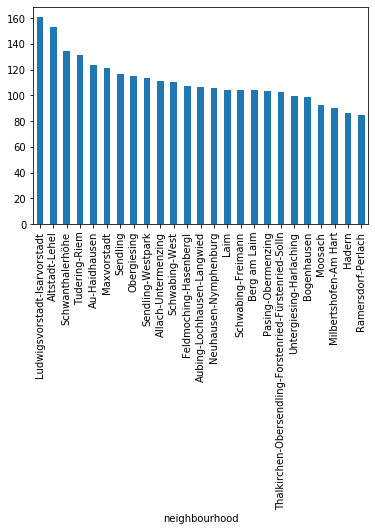

In [20]:
neighbourhood_grouped = listings_selected_cols.groupby('neighbourhood').mean()
neighbourhood_grouped.sort_values('price', ascending = False, inplace=True)
neighbourhood_grouped['price'].plot(kind='bar')

In [21]:
listings_selected_cols[['neighbourhood', 'price']]

,neighbourhood,price
0,Ludwigsvorstadt-Isarvorstadt,95.0
1,Hadern,80.0
2,Berg am Laim,95.0
3,Maxvorstadt,120.0
4,Schwabing-West,35.0
...,...,...
11476,Neuhausen-Nymphenburg,80.0
11477,Sendling,180.0
11478,Laim,30.0
11479,Neuhausen-Nymphenburg,40.0


In [22]:
listings_selected_cols.describe()

,id,host_total_listings_count,latitude,longitude,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,review_scores_rating,reviews_per_month
count,1.148100e+04,11458.000000,11481.000000,11481.000000,11481.000000,11451.000000,11460.000000,11463.000000,11481.000000,7914.000000,8747.000000,8927.000000
mean,2.233223e+07,1.960813,48.140367,11.564821,2.652295,1.082002,1.099913,1.516968,116.336469,30.517437,94.877901,0.981534
std,1.220178e+07,10.206634,0.025040,0.043936,1.483356,0.700966,0.374904,1.216290,168.078321,31.813406,8.075292,1.460352
min,3.672000e+04,0.000000,48.070270,11.378370,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,20.000000,0.010000
25%,1.154796e+07,1.000000,48.123690,11.540760,2.000000,1.000000,1.000000,1.000000,55.000000,12.000000,93.000000,0.160000
50%,2.220372e+07,1.000000,48.137790,11.566160,2.000000,1.000000,1.000000,1.000000,82.000000,25.000000,98.000000,0.500000
75%,3.350092e+07,2.000000,48.156780,11.585120,3.000000,1.000000,1.000000,2.000000,130.000000,40.000000,100.000000,1.200000
max,4.035420e+07,685.000000,48.222970,11.712010,16.000000,25.000000,24.000000,50.000000,9000.000000,500.000000,100.000000,55.260000


In [23]:
listings_selected_cols[lambda x :x]

ValueError: Must pass DataFrame with boolean values only

In [34]:
listings_df['price'][lambda x : (x)]

price
$95.00     NaN
$80.00     NaN
$95.00     NaN
$120.00    NaN
$35.00     NaN
          ... 
$80.00     NaN
$180.00    NaN
$30.00     NaN
$40.00     NaN
$60.00     NaN
Name: price, Length: 11481, dtype: object